# Machine Learning Breast Cancer Classification 

-> This project implementation of Logistic Regression, KNeighborsClassifier, Decision Tree & RandomForest Classification supervised machine learning algorithms.


# Machine Learning Pathway
  * Copyright @ 2023 Jung Hyeonjoong

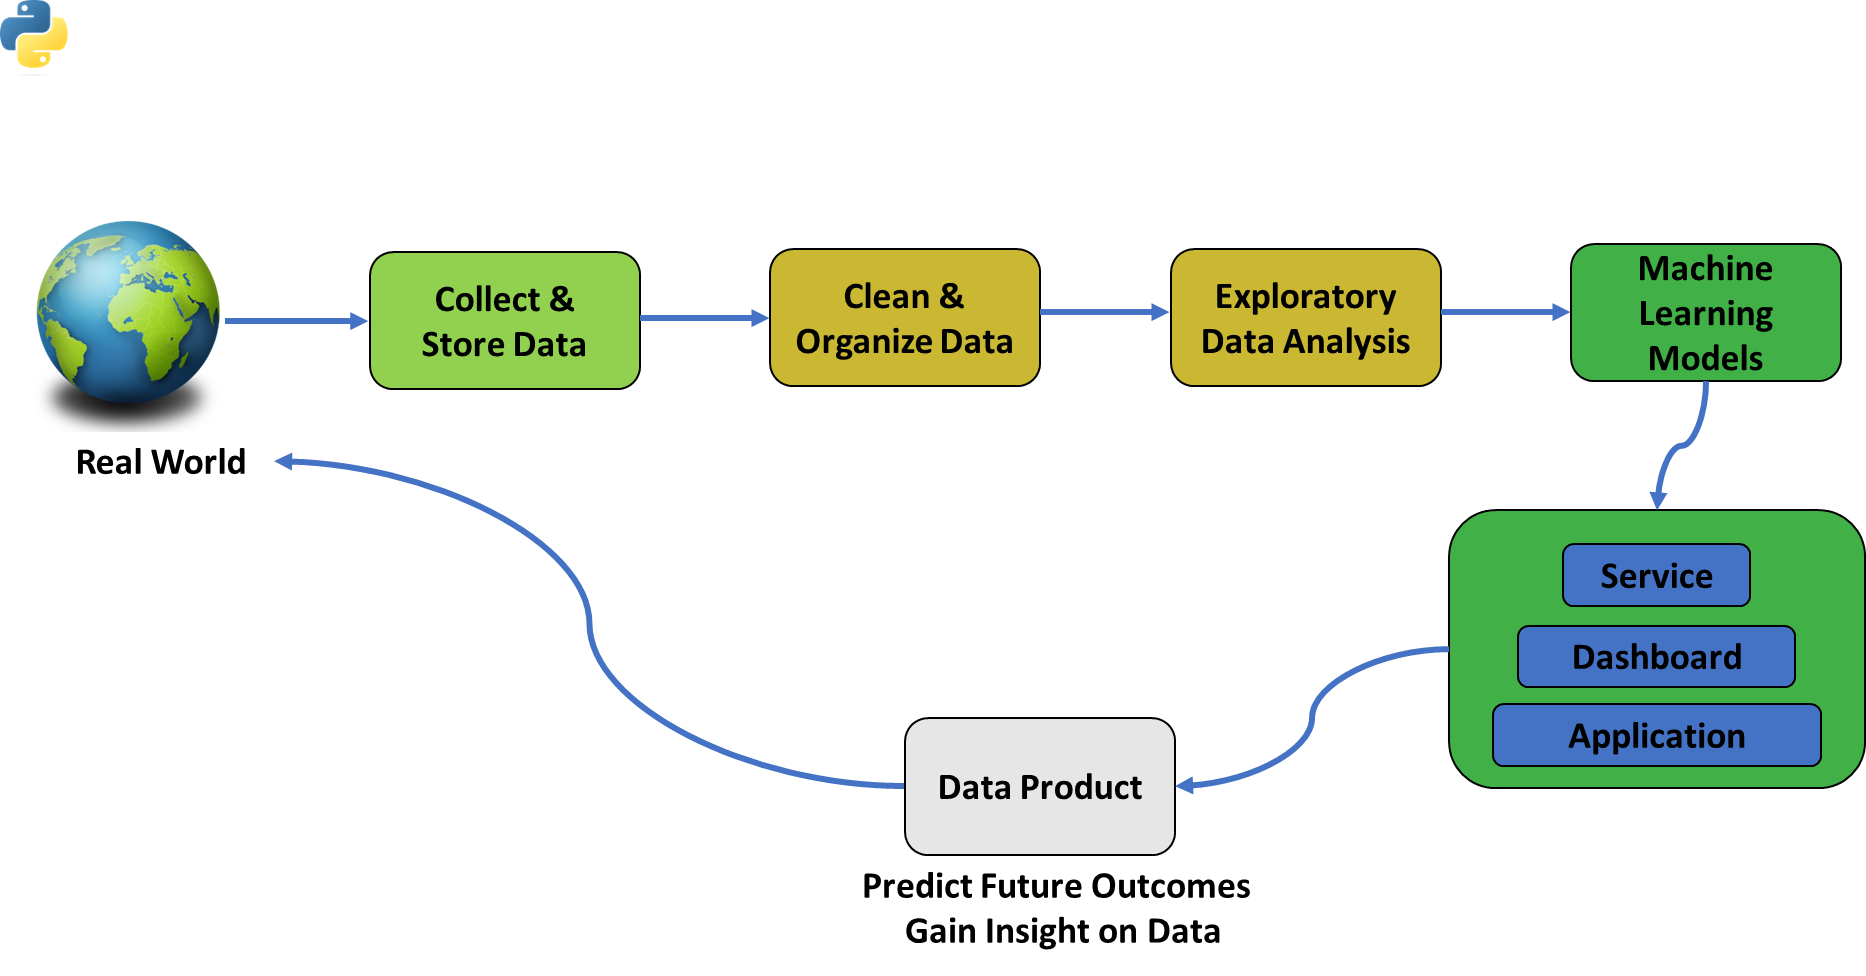

Dataset available at https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/code?resource=download

# Import the librairies

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import warnings
from scipy import stats

# Data Read & Analysis

In [2]:
# read the data from csv
data = pd.read_csv("data.csv")

In [3]:
# check the first 10 rows of the dataframe
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [4]:
# check the dimensions of the dataframe
data.shape

(569, 33)

In [5]:
# check the columns of the data
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
# The features 'id' & 'Unnamed: 32' are dropped because 'id' cannot be used for classificaiton and 'Unnamed: 32' feature includes NaN.
data.drop(['Unnamed: 32', 'id'], axis=1,inplace=True)
data.shape

(569, 31)

In [7]:
# check the dataframe again
data.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


# Data Visualization

<AxesSubplot: xlabel='diagnosis', ylabel='count'>

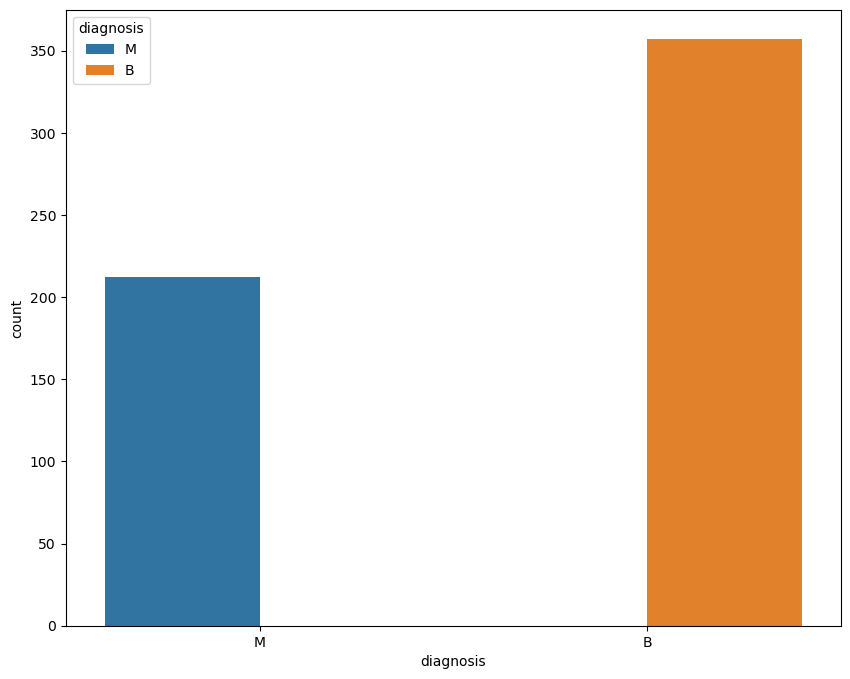

In [8]:
# check how many subjects tested with Malignant and Benign are with counterplot
plt.figure(figsize=(10,8))
sns.countplot(data, x='diagnosis', hue='diagnosis')

<AxesSubplot: xlabel='diagnosis', ylabel='radius_mean'>

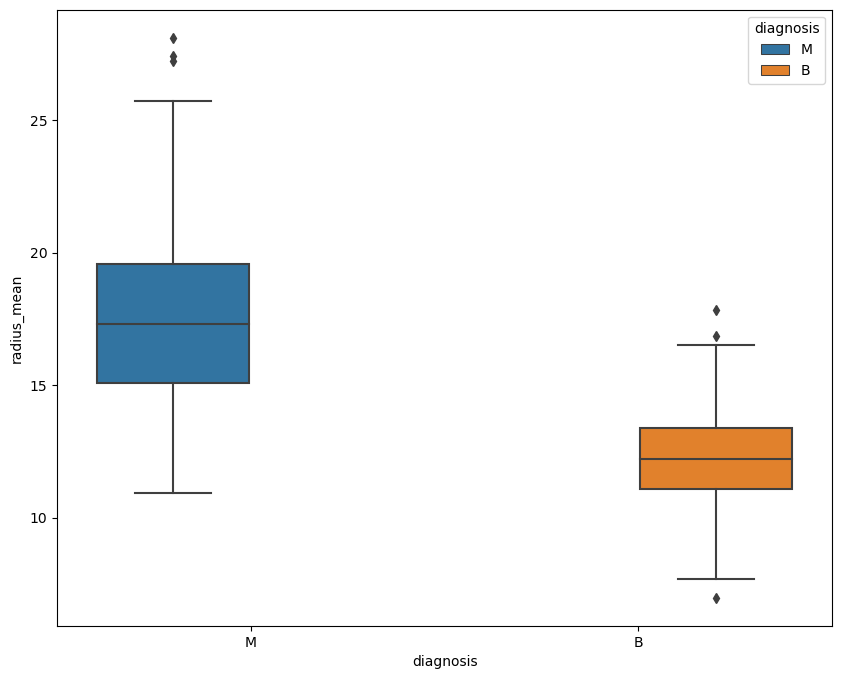

In [9]:
#check how many subjects tested with Malignant and Benign are with barplot
plt.figure(figsize=(10,8))
sns.boxplot(data, x='diagnosis', y= 'radius_mean',hue='diagnosis')

Here the Label Encoder is used to modify the 'diagnosis' feature. So, "Malignant(M)":1,"Benign(B)":0

In [10]:
# Describe the all dataframe
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [11]:
# Encode the labels to numeric numbers for a machine language
label_enncode = LabelEncoder()

data['diagnosis']= label_enncode.fit_transform(data['diagnosis'])
  
data['diagnosis'].unique()

array([1, 0])

In [12]:
# Split the data for X and Y sets
columns = data.columns.tolist()
columns = [c for c in columns if c not in ['diagnosis']]
X = data[columns]
Y = data['diagnosis']
print(X.shape,Y.shape)

(569, 30) (569,)


70%-20%-20% split for Train-Dev-Test set

In [13]:
# Split the data to training and test dataset for training the models
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.20, random_state=42)



print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
#print("X_cv.shape", X_cv.shape, "y_cv.shape", y_cv.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X_train.shape (455, 30) y_train.shape (455,)
X_test.shape (114, 30) y_test.shape (114,)


# Correlation-based feature selection

The heatmap shows the correlation matrix between the features. It shows which features are highly correlated to each other. These redundant features may cause overfitting.

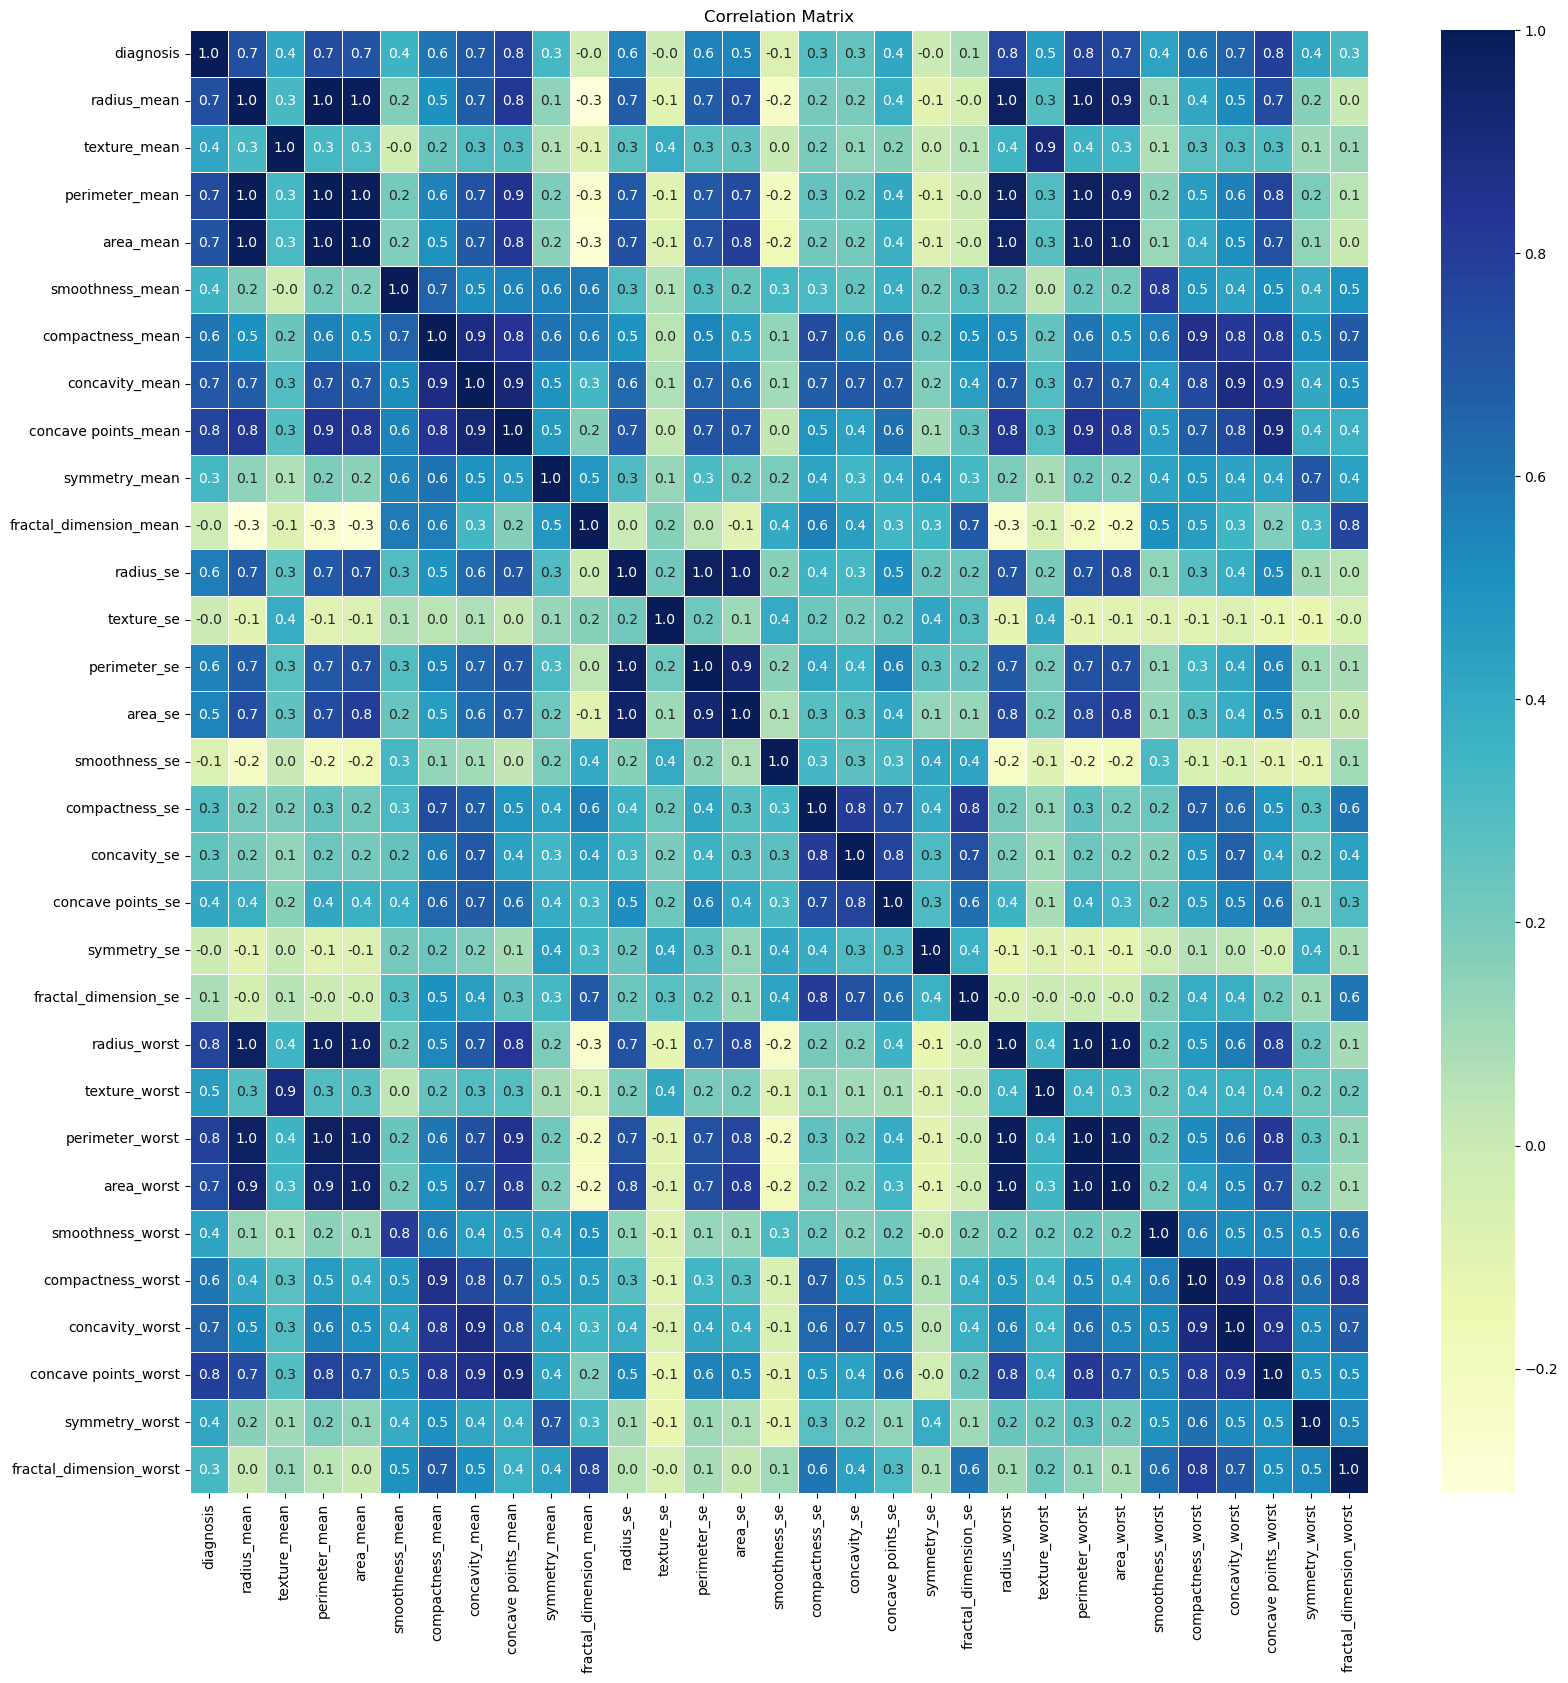

In [14]:
# Check the correlation of the dataset
corr = data.corr()
plt.figure(figsize=(19,19))
sns.heatmap(corr, cmap='YlGnBu', annot=True,linewidths=.5, fmt= '.1f')
plt.title('Correlation Matrix')
plt.show()

It is evident from the heatmap that the following features are correlated to each other (>= 0.9)

->>> radius mean, perimeter_mean, area_mean 

->>> compactness_mean, concavity_mean, concave points_mean

->>> radius_se, perimeter_se, area_se

->>> compactness_se, concavity_se, concave points_se 

->>> radius_worst, perimeter_worst, area_worst 

->>> compactness_worst, concavity_worst, concave points_worst 

->>> texture_mean, texture_worst 

To choose one of each correlated features we need to check their individual correlation to the target feature 'diagnosis'

In [15]:
# Check correlation of the data numeric visualization with diagnosis
data.corr()['diagnosis'].sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

Out of all the features that are correlated to each other, the one with highest correlation to the the target is selected and the rest are dropped:

**radius_mean**, **perimeter_mean** and **area_mean** --> **perimeter_mean** 

**compactness_mean**, **concavity_mean** and **concave points_mean** --> **concave points_mean**  

**radius_se**, **perimeter_se** and **area_se** --> **radius_se** 

**compactness_se**, **concavity_se** and **concave points_se** --> **concave points_se** 

**radius_worst**, **perimeter_worst** and **area_worst** --> **perimeter_worst** 

**compactness_worst**, **concavity_worst** and **concave points_worst** --> **concave points_worst** 

**texture_mean**, **texture_worst** --> **texture_worst** 

In [16]:
# Features to drop from the dataframe
drop_list = ['radius_mean','area_mean','compactness_mean','concavity_mean','perimeter_se','area_se','compactness_se','concavity_se','radius_worst','area_worst','compactness_worst','concavity_worst','texture_mean']

In [17]:
# Drop the list of dataset
X = X.drop(drop_list,axis = 1 )       

In [18]:
# Check the demensions of the dataframe
X.shape

(569, 17)

Comment: Now with only 17 features out of 32 we can model different claasifiers.

In [19]:
# Initializing all the supervised machine learning classification algorithms
key = ['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier']
value = [LogisticRegression(max_iter=1000, random_state=42, solver='sag'), 
         KNeighborsClassifier(n_neighbors = 5, weights ='uniform'), 
         DecisionTreeClassifier(random_state=42), 
         RandomForestClassifier(n_estimators=50, random_state=42)]
classifiers = dict(zip(key,value))
classifiers

{'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42, solver='sag'),
 'KNeighborsClassifier': KNeighborsClassifier(),
 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
 'RandomForestClassifier': RandomForestClassifier(n_estimators=50, random_state=42)}

In [20]:
train_accuracy = []
test_accuracy = []

for classifier_name, classifier_model in classifiers.items():
    classifier_model.fit(X_train, y_train)
    
    # Calculate accuracy on training set
    train_pred = classifier_model.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_accuracy.append(train_acc)
    
    # Calculate accuracy on test set
    test_pred = classifier_model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_accuracy.append(test_acc * 100)
    
    # Ignore the FutureWarning
    warnings.simplefilter(action='ignore', category=FutureWarning)
    
    # Print accuracy scores
    print('\n', classifier_name)
    print("Train Set Accuracy Score:", np.round(train_acc*100,0))
    print("Test Set Accuracy Score:", np.round(test_acc*100,0))


 LogisticRegression
Train Set Accuracy Score: 91.0
Test Set Accuracy Score: 97.0

 KNeighborsClassifier
Train Set Accuracy Score: 94.0
Test Set Accuracy Score: 96.0

 DecisionTreeClassifier
Train Set Accuracy Score: 100.0
Test Set Accuracy Score: 95.0

 RandomForestClassifier
Train Set Accuracy Score: 100.0
Test Set Accuracy Score: 96.0


C:\Users\neudo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Text(0.5, 1.0, 'Plotting the Model Accuracies')

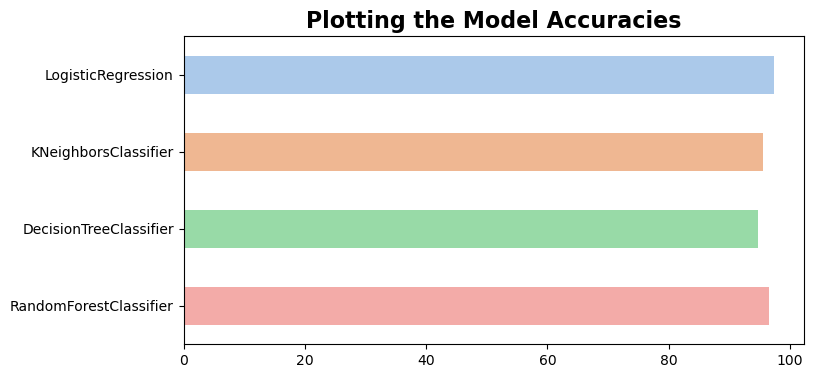

In [21]:
# Check the best model for prediction
plt.figure(figsize = (8,4))
sns.barplot(x = test_accuracy, y = key, palette="pastel", width=0.5)
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")

In [22]:
# Generate classification report
y_test = y_test
y_pred =  classifier_model.predict(X_test)
classification_rep = classification_report(y_test, y_pred)

# Print classification report
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



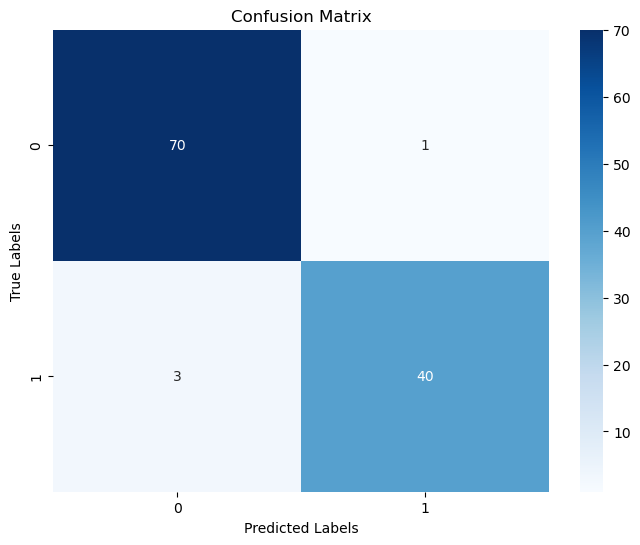

In [23]:
# Assuming you have the predicted labels stored in 'y_pred' and the true labels in 'y_test'

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

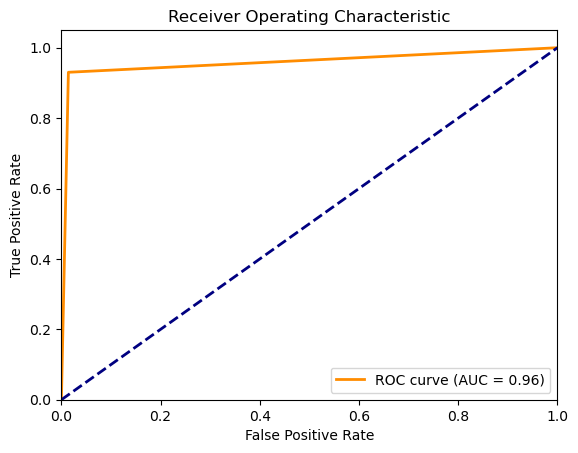

In [24]:
# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Conclusion

RandomForestClassifier has the highest accuracy of 98% followed closely by Logistic Regression and KNeighborsClassifier at 96%, with the dimensions of the dataset reduced from 32 to 17 

Copyright @ 2023 Jung Hyeonjoong